In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 한글 font 설정
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 컬럼을 다 보여주는 함수
from IPython.display import display
pd.options.display.max_columns = None

market = pd.read_csv("market.csv",engine='python',encoding='euc-kr')
# 변화량 파생변수를 만들기 위해 테이블 다시 불러오기
sales = pd.read_csv("상권_추정매출.csv", engine='python', encoding="utf-8")
com_fpop = pd.read_csv("상권_추정유동인구.csv", engine='python', encoding="utf-8")

# 1. 데이터 탐색

In [4]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171129 entries, 0 to 171128
Columns: 119 entries, 기준_년월_코드 to 행정동_코드
dtypes: float64(54), int64(62), object(3)
memory usage: 155.4+ MB


In [5]:
# market 의 모든 컬럼을 확인
display(market.head())

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,201501,11947,당산로44길,CS100001,한식음식점,96722641,4527,68.7,31.3,16.6,11.8,12.9,13.8,13.7,18.3,13.0,0.0,7.4,24.3,29.4,33.7,5.2,43.9,56.1,0.1,8.7,34.1,38.6,12.5,5.9,59943839,36778802,13178133,9605221,12123291,11240584,13796610,21296549,15482253,0,5957701,20151738,26902535,38087321,5623346,45157908,43295906,11314,5735019,28568366,34279358,13193784,6665974,3109,1418,750,535,582,623,619,828,590,0,336,1102,1330,1524,235,1902,2435,4,377,1481,1677,544,256,2,194.0,84.0,84.0,0.0,460.0,6.0,10.0,11239.0,6095.0,5144.0,441.0,1861.0,2878.0,2738.0,2146.0,1175.0,153.0,1638.0,2421.0,2571.0,3293.0,1163.0,1992.0,1938.0,1955.0,1715.0,1582.0,1247.0,811.0,375,148,227,0,30,121,121,65,38,119.5763,23.795221,11560,11560560
1,201501,11947,당산로44길,CS100004,양식집,14242932,910,77.4,22.6,17.1,13.2,12.7,17.1,17.1,15.3,7.4,0.0,0.0,34.1,24.0,41.1,0.9,38.5,61.5,3.6,25.0,22.4,37.2,9.1,2.7,10806474,3436458,2534896,1818453,1567337,2345461,2540327,2187723,1248735,0,0,4866146,3062054,6125967,188765,5579688,6844420,345685,2627158,2836533,5124033,1087649,403051,704,206,156,120,116,156,156,139,67,0,0,310,218,374,8,311,497,29,202,181,301,74,22,1,194.0,84.0,84.0,0.0,460.0,6.0,10.0,11239.0,6095.0,5144.0,441.0,1861.0,2878.0,2738.0,2146.0,1175.0,153.0,1638.0,2421.0,2571.0,3293.0,1163.0,1992.0,1938.0,1955.0,1715.0,1582.0,1247.0,811.0,375,148,227,0,30,121,121,65,38,119.5763,23.795221,11560,11560560
2,201501,11947,당산로44길,CS100005,분식집,5084735,653,84.4,15.6,13.2,12.4,18.2,21.9,18.7,15.6,0.0,0.0,4.9,37.1,24.7,33.4,0.0,46.5,53.5,3.2,22.0,22.1,39.2,11.8,1.7,4180841,903894,599501,495649,1109460,1108896,867335,903894,0,0,332396,1995384,1050343,1706612,0,1895083,2433745,119383,722599,1065427,1859625,463095,98700,551,102,86,81,119,143,122,102,0,0,32,242,161,218,0,272,313,19,129,130,230,69,10,1,194.0,84.0,84.0,0.0,460.0,6.0,10.0,11239.0,6095.0,5144.0,441.0,1861.0,2878.0,2738.0,2146.0,1175.0,153.0,1638.0,2421.0,2571.0,3293.0,1163.0,1992.0,1938.0,1955.0,1715.0,1582.0,1247.0,811.0,375,148,227,0,30,121,121,65,38,119.5763,23.795221,11560,11560560
3,201501,11947,당산로44길,CS100006,패스트푸드점,18820989,2098,69.6,30.4,11.7,13.2,13.7,13.3,17.6,18.1,12.3,0.0,0.1,21.7,25.1,41.4,11.7,46.1,53.9,2.7,26.7,25.8,28.3,12.0,4.4,12723588,6097401,2004812,2323362,2469634,2310159,3615621,3543682,2553719,0,29892,4868723,4239868,7549144,2133362,8487421,8614970,352729,4745493,3761014,5458935,1984602,799618,1460,638,246,277,288,280,369,379,259,0,3,455,527,868,245,864,1012,51,502,484,532,226,82,2,194.0,84.0,84.0,0.0,460.0,6.0,10.0,11239.0,6095.0,5144.0,441.0,1861.0,2878.0,2738.0,2146.0,1175.0,153.0,1638.0,2421.0,2571.0,3293.0,1163.0,1992.0,1938.0,1955.0

In [6]:
# 업종의 개수
print(market['서비스_업종_코드_명'].value_counts())
fig = plt.figure(figsize = (15,8))
order = market['서비스_업종_코드_명'].value_counts(ascending=False).index
sns.countplot(market['서비스_업종_코드_명'],order=order,hue=market['기준_년월_코드'].apply(lambda x:str(x)[:4]).astype(int))

한식음식점     22538
호프간이주점    20686
분식집       20322
일식집       18387
커피음료      17593
치킨집       17388
양식집       16703
중국집       12947
제과점       12755
패스트푸드점    11810
Name: 서비스_업종_코드_명, dtype: int64


In [7]:
# 2년간 총매출액 TOP10 상권 

com_month_sales = pd.DataFrame(market.groupby(['상권_코드_명'])['당월_매출_금액'].sum()).sort_values(by='당월_매출_금액',ascending=False).reset_index().head(10)
fig = plt.figure(figsize = (15,8))
sns.barplot(data = com_month_sales, x=com_month_sales['상권_코드_명'],y=com_month_sales['당월_매출_금액'])
plt.title('2년간 총매출액 TOP10 상권')

In [8]:
data = market.groupby(['서비스_업종_코드_명'])['당월_매출_금액','당월_매출_건수','점포'].sum().reset_index()

In [9]:
data['점포별평균당월매출금액'] = data['당월_매출_금액']/data['점포']
data['점포별평균당월매출건수'] = data['당월_매출_건수']/data['점포']
data.head()

,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,점포별평균당월매출금액,점포별평균당월매출건수
0,분식집,803034024853,61348969,67860,1.183369e+07,904.052004
1,양식집,829628090954,42559302,52423,1.582565e+07,811.844076
2,일식집,1260856622154,27829372,52702,2.392427e+07,528.051535
3,제과점,460431165485,46488540,23498,1.959448e+07,1978.404119
4,중국집,659781348907,24720779,25447,2.592767e+07,971.461430


In [10]:
# 서울시 전체에서 업종별 전체 갯수

fig = plt.figure(figsize = (15,8))
sns.barplot(data=market.groupby(['서비스_업종_코드_명'])['점포'].sum().sort_values(ascending=False).reset_index()
            ,x='서비스_업종_코드_명',y='점포')

- 서울시 내 점포의 총 갯수는 한식음식점이 압도적으로 많이 존재

In [11]:
## 매출 금액 
# 2년간 서울시 전체 골목상권의 업종 별 매출액
fig = plt.figure(figsize = (15,8))
sns.barplot(data=market.groupby(['서비스_업종_코드_명'])['당월_매출_금액'].sum().sort_values(ascending=False).reset_index()
            ,x='서비스_업종_코드_명',y='당월_매출_금액')

In [12]:
# 2년간 서울시 전체 골목상권의 업종 별 점포1개당 평균매출액
#data = market_df.groupby(['서비스_업종_코드_명'])['점포별평균당월매출금액'].sum().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize = (15,8))
sns.barplot(data=data.sort_values(by='점포별평균당월매출금액',ascending=False),
            x='서비스_업종_코드_명',y='점포별평균당월매출금액')

- 서울시 골목상권 전체적으로는 한식음식점에 가장 많은 매출액, 제과점이 가장 낮은 매출액, 점포수가 큰 매출액의 큰 영향을 끼친것으로 보임
- 점포수를 고려하여 매출액의 합계를 본 결과 중국집이 매출금액이 가장 크고 호프간이 주점이 가장 낮은것으로 확인하였다, 이것도 호프간이주점은 대부분이 저녁에만 장사하기 때문이 아닐까?

In [13]:
## 매출 건수
fig = plt.figure(figsize = (15,8))
sns.barplot(data=market.groupby(['서비스_업종_코드_명'])['당월_매출_건수'].sum().sort_values(ascending=False).reset_index()
            ,x='서비스_업종_코드_명',y='당월_매출_건수')

In [14]:
fig = plt.figure(figsize = (15,8))

sns.barplot(data=data.sort_values(by='점포별평균당월매출건수',ascending=False),
            x='서비스_업종_코드_명',y='점포별평균당월매출건수')

- 서울시 전체 상권의 매출 건수는 한식음식점이 압도적으로 많았지만 이것도 점포수를 고려하면 달라질 것으로 보임
- 점포수를 고려하여 확인해본결과 제과점이 가장 많은 매출건수를 보였고 패트스푸드점 커피음료 순으로 높은 매출건수를 올렸다. 아마 제과점, 패스트푸드점 , 커피음료점은 take out도 많고 빠르게 먹을 수 있는 음식이기 때문인것으로 예상됨

# 단변수 분석
- pca와 클러스터링을 위해 단변수 먼저 보고 이상치 제거 후 정규화 진행
- 컬럼이 많아 하나하나씩 확인해볼수 없었기 때문에 먼저 매출 금액, 매출 건수에서 이상치 판별

In [15]:
# 종속변수인 당월매출금액의 데이터가 너무 왼쪽에 치우쳐져 있음
fig = plt.figure(figsize=(15,8))
sns.distplot(market['당월_매출_금액'])

In [16]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(market['당월_매출_금액'])

In [17]:
market[market['당월_매출_금액']>3500000000]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
83172,201512,12896,강남대로107길,CS100003,일식집,5031070054,21759,73.1,26.9,10.4,15.7,16.5,16.7,13.8,14.2,12.7,5.2,8.1,15.7,20.6,30.8,19.5,72.9,27.1,0.3,14.0,36.1,28.2,11.8,9.6,3342835013,1688235041,524593494,822004563,764024203,679780815,552431938,930611683,757623358,175024240,206550948,628547143,1289371280,1425445537,1306130906,1960770317,924477477,3127308,202228143,939629170,628467417,549468126,562327632,15909,5850,2263,3417,3582,3636,3011,3093,2757,1134,1758,3419,4486,6711,4251,11135,4129,41,2138,5507,4298,1809,1473,1,651.0,279.80,72.0,207.80,474.0,6.0,3.0,7495.0,4107.0,3388.0,270.0,1446.0,2076.0,1865.0,1216.0,621.0,301.0,886.0,1485.0,1813.0,2181.0,828.0,1189.0,1246.0,1251.0,1199.0,1106.0,935.0,568.0,2348,1308,1040,0,381,785,574,339,269,119.677480,23.787022,11680,11680521
133473,201607,13169,언주로_C,CS100001,한식음식점,7079937906,483592,72.0,28.0,12.9,13.5,13.8,14.1,17.6,14.8,13.2,0.1,17.7,29.0,23.9,23.7,5.6,36.9,63.1,0.4,24.0,34.5,23.5,11.7,5.9,5218909300,1861028606,903831023,992219291,1006775392,1045589850,1270493744,997996760,863031846,14943483,938906522,1974794317,1491805787,1974212057,685275740,2198537376,3316874205,15413824,1064973566,1917921097,1412636986,713608549,390857564,348125,135467,62429,65477,66953,68049,85217,71550,63917,359,85550,140403,115483,114793,27004,161770,276707,1702,105342,151354,102873,51310,25899,27,1633.0,672.17,187.0,485.17,6370.0,10.0,6.0,4213.0,2375.0,1838.0,50.0,742.0,1384.0,1102.0,595.0,340.0,123.0,617.0,955.0,1043.0,1101.0,375.0,736.0,750.0,753.0,749.0,744.0,314.0,168.0,4007,2123,1884,3,593,1567,1026,471,347,119.698575,23.769202,11680,11680650
140516,201608,13169,언주로_C,CS100001,한식음식점,6979630268,495090,77.9,22.1,15.8,16.7,17.3,13.8,14.4,11.7,10.4,0.1,17.7,29.2,24.0,23.5,5.5,36.7,63.3,0.4,23.6,34.3,23.3,12.1,6.2,5537619338,1442010930,1077346519,1176600118,1256242889,1011812336,1015617476,770354721,671656209,21927732,954190445,1991299021,1508722629,1931781031,571709410,2160862074,3332008272,18207018,1032153026,1898862529,1426694885,730097305,386855590,385583,109507,78065,82516,85465,68387,71150,57874,51633,426,87595,144666,118836,116526,27041,165476,284866,1957,106363,154693,104915,54707,27711,27,1633.0,672.17,187.0,485.17,6370.0,10.0,6.0,3783.0,2129.0,1654.0,40.0,687.0,1251.0,982.0,528.0,296.0,101.0,553.0,866.0,940.0,996.0,327.0,581.0,689.0,687.0,692.0,694.0,291.0,149.0,4007,2123,1884,3,593,1567,1026,471,347,119.698575,23.769202,11680,11680650
147544,201609,13169,언주로_C,CS100001,한식음식점,6432488493,434205,76.7,23.3,14.1,14.7,13.3,16.9,17.7,12.1,11.3,0.1,18.3,29.3,23.7,23.2,5.5,37.1,62.9,0.4,25.0,34.5,22.0,11.8,6.2,5040943508,13915449

In [18]:
# 종속변수 당월매출금액에 너무 큰 데이터는 이상치로 간주하고 제거함
# 제거된 이상치와 이유
# 133474, 140517 , 147545, 154659, 161795, 168930 -> 언주로_C 한식음식점 -> 동일한 점포수에서 급격히 7배이상 뛴 이후 
# 83172 -> 강남대로107길 일식집 -> 점포수1개 에서 매출액 : 5031070054 

In [19]:
# 이상치 제거
# 다른 값들에 비해 지나치게 높은 값 제거 
market = market[market.index!=83172] # 강남대로107길, 일식집
market = market[market.index!=133474] # 언주로_C, 한식음식점
market = market[market.index!=140517] # 언주로_C, 한식음식점
market = market[market.index!=147545] # 언주로_C, 한식음식점
market = market[market.index!=154659] # 언주로_C, 한식음식점
market = market[market.index!=161795] # 언주로_C, 한식음식점
market = market[market.index!=168930] # 언주로_C, 한식음식점

In [20]:
# 매출금액이 음수인것 제거
# 이상치 제거 기준 : 매출 금액의 최소는 0이라고 생각
# 매출금액 뿐만아니라 건수에도 - 가 있는것으로 보아 오류값이라고 판단.
market[market['당월_매출_금액']<=0].iloc[:,:10]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율


In [21]:
market = market[market.index!=110951]
market = market[market.index!=167812]

In [22]:
# 종속변수인 당월매출금액의 데이터가 너무 왼쪽에 치우쳐져 있음
# 변수끼리의 비교를 위해 정규화를 시도했음
################################### 매출 건수 분포 확인 ###################################
fig,ax = plt.subplots(2,2,figsize=(18,15))
sns.distplot(market['당월_매출_금액'] ,ax=ax[0][0])
sns.distplot((np.log(market['당월_매출_금액'])) ,ax=ax[0][1])
sns.boxplot((market['당월_매출_금액']) ,ax=ax[1][0])
sns.boxplot((np.log(market['당월_매출_금액'])) ,ax=ax[1][1])

In [23]:
# log 변환 전에는 보이지 않았지만 log변환 후 값이 떨어져 있는 값 확인
market[np.log(market['당월_매출_금액'])<5]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
12469,201502,13227,구일로10길,CS100003,일식집,76,8,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,76,0,0,0,0,76,0,0,0,0,0,0,0,76,0,76,0,0,0,0,76,0,0,8,0,0,0,0,8,0,0,0,0,0,0,0,8,0,8,0,0,0,0,8,0,0,1,928.0,281.0,273.0,8.0,277.0,2.0,21.0,9651.0,5406.0,4245.0,443.0,1232.0,2860.0,2562.0,1821.0,734.0,68.0,1466.0,2276.0,2363.0,2728.0,749.0,1993.0,1984.0,1694.0,1587.0,1143.0,667.0,582.0,716,329,387,0,31,162,198,221,104,119.554762,23.756838,11530,11530520


In [24]:
# 당월매출금액이 76인 값이 있어 확인해본 결과 주중-목요일-시간대_14~17시-남성 비율에서 100%인것을확인 이상치로 구분해도 될것으로 보고 제거

market[(market['상권_코드_명']=='구일로10길') & (market['서비스_업종_코드_명']=='일식집')]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
12469,201502,13227,구일로10길,CS100003,일식집,76,8,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,76,0,0,0,0,76,0,0,0,0,0,0,0,76,0,76,0,0,0,0,76,0,0,8,0,0,0,0,8,0,0,0,0,0,0,0,8,0,8,0,0,0,0,8,0,0,1,928.0,281.0,273.0,8.0,277.0,2.0,21.0,9651.0,5406.0,4245.0,443.0,1232.0,2860.0,2562.0,1821.0,734.0,68.0,1466.0,2276.0,2363.0,2728.0,749.0,1993.0,1984.0,1694.0,1587.0,1143.0,667.0,582.0,716,329,387,0,31,162,198,221,104,119.554762,23.756838,11530,11530520
19670,201503,13227,구일로10길,CS100003,일식집,32325700,2055,72.3,27.7,10.1,17.1,14.3,14.4,16.4,16.6,11.1,0.0,0.0,28.8,17.1,47.1,7.1,47.7,52.3,2.1,16.0,29.8,30.9,15.3,5.9,23317016,9008684,3592343,5276628,4257752,4799234,5391059,5486278,3522406,0,0,10040225,4941010,15346861,1997604,13828910,15714673,453289,4091322,8444021,9758618,4736471,2059863,1485,570,208,352,293,296,336,342,228,0,0,591,352,967,145,902,989,39,302,564,585,290,112,1,928.0,281.0,273.0,8.0,277.0,2.0,21.0,12027.0,6509.0,5518.0,813.0,1582.0,3417.0,3070.0,2213.0,933.0,72.0,1892.0,2788.0,2919.0,3332.0,1025.0,2344.0,2279.0,1788.0,1797.0,1887.0,1061.0,871.0,716,329,387,0,31,162,198,221,104,119.554762,23.756838,11530,11530520
26891,201504,13227,구일로10길,CS100003,일식집,28369970,1777,65.5,34.5,0.0,14.5,19.2,17.1,14.8,16.7,17.8,0.0,0.0,30.6,14.2,45.8,9.5,55.1,44.9,0.5,14.0,33.5,29.5,14.2,8.2,18096122,10273848,0,3779765,5365768,4732551,4218038,4988861,5284987,0,0,8738772,3979503,13023300,2628395,13201284,11540846,106589,3114393,7965745,7806446,3624578,2124379,1164,613,0,257,341,303,263,297,316,0,0,543,253,813,168,876,713,8,222,533,469,226,131,1,928.0,281.0,273.0,8.0,277.0,2.0,21.0,10401.0,5678.0,4723.0,635.0,1332.0,2994.0,2727.0,1945.0,768.0,57.0,1655.0,2404.0,2530.0,2887.0,869.0,1766.0,1751.0,1743.0,1722.0,1809.0,1016.0,594.0,716,329,387,0,31,162,198,221,104,119.554762,23.756838,11530,11530520
34117,201505,13227,구일로10길,CS100003,일식집,30564864,1904,67.1,32.9,8.7,8.6,14.4,14.9,20.5,16.2,16.7,0.0,0.3,30.1,17.6,40.8,11.1,48.3,51.7,1.1,15.2,32.5,28.3,14.9,7.9,20494763,10070101,2442571,3113779,3966270,4312201,6659942,4973623,5096478,0,83785,10126582,4560537,12416267,3377693,12524898,14975413,189812,3589651,9230021,7547303,4293065,2650460,1278,626,166,163,274,284,391,308,318,0,6,573,336,777,212,836,894,19,263,562,490,258,137,1,928.0,281.0,273.0,8.0,277.0,2.0,21.0,9555.0,5127.0,4428.0,669.0,1274.0,2725.0,2484.0,1730.0,673.0,59.0,1497.0,2134.0,2245.0,2731.0,889.0,1437.0,1470.0,1706.0,1694.0,1713.0,938.0,597.0,716,329,387,0,31,162,198,221,104,119.554762,23.756838,11530,11530520
41343,201506,13227,구일로10길,CS100003,일식집,20139335,1433,6

In [25]:
# 이상치 제거기준 : 정규화했는데 너무 동떨어져있는 경우
market = market[market.index != 12469] # 구일로10길 , 일식집

In [26]:
################################### 매출 건수 분포 확인 ###################################
fig,ax = plt.subplots(2,2,figsize=(18,15))
sns.distplot(market['당월_매출_건수'] ,ax=ax[0][0])
sns.distplot((np.log(market['당월_매출_건수'])) ,ax=ax[0][1])
sns.boxplot((market['당월_매출_건수']) ,ax=ax[1][0])
sns.boxplot((np.log(market['당월_매출_건수'])) ,ax=ax[1][1])

In [27]:
market[market['당월_매출_건수']>100000]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
133473,201607,13169,언주로_C,CS100001,한식음식점,7079937906,483592,72.0,28.0,12.9,13.5,13.8,14.1,17.6,14.8,13.2,0.1,17.7,29.0,23.9,23.7,5.6,36.9,63.1,0.4,24.0,34.5,23.5,11.7,5.9,5218909300,1861028606,903831023,992219291,1006775392,1045589850,1270493744,997996760,863031846,14943483,938906522,1974794317,1491805787,1974212057,685275740,2198537376,3316874205,15413824,1064973566,1917921097,1412636986,713608549,390857564,348125,135467,62429,65477,66953,68049,85217,71550,63917,359,85550,140403,115483,114793,27004,161770,276707,1702,105342,151354,102873,51310,25899,27,1633.0,672.17,187.0,485.17,6370.0,10.0,6.0,4213.0,2375.0,1838.0,50.0,742.0,1384.0,1102.0,595.0,340.0,123.0,617.0,955.0,1043.0,1101.0,375.0,736.0,750.0,753.0,749.0,744.0,314.0,168.0,4007,2123,1884,3,593,1567,1026,471,347,119.698575,23.769202,11680,11680650
140516,201608,13169,언주로_C,CS100001,한식음식점,6979630268,495090,77.9,22.1,15.8,16.7,17.3,13.8,14.4,11.7,10.4,0.1,17.7,29.2,24.0,23.5,5.5,36.7,63.3,0.4,23.6,34.3,23.3,12.1,6.2,5537619338,1442010930,1077346519,1176600118,1256242889,1011812336,1015617476,770354721,671656209,21927732,954190445,1991299021,1508722629,1931781031,571709410,2160862074,3332008272,18207018,1032153026,1898862529,1426694885,730097305,386855590,385583,109507,78065,82516,85465,68387,71150,57874,51633,426,87595,144666,118836,116526,27041,165476,284866,1957,106363,154693,104915,54707,27711,27,1633.0,672.17,187.0,485.17,6370.0,10.0,6.0,3783.0,2129.0,1654.0,40.0,687.0,1251.0,982.0,528.0,296.0,101.0,553.0,866.0,940.0,996.0,327.0,581.0,689.0,687.0,692.0,694.0,291.0,149.0,4007,2123,1884,3,593,1567,1026,471,347,119.698575,23.769202,11680,11680650
147544,201609,13169,언주로_C,CS100001,한식음식점,6432488493,434205,76.7,23.3,14.1,14.7,13.3,16.9,17.7,12.1,11.3,0.1,18.3,29.3,23.7,23.2,5.5,37.1,62.9,0.4,25.0,34.5,22.0,11.8,6.2,5040943508,1391544985,920933628,972780143,862915400,1101573064,1182741273,737464265,654080720,19247942,914918055,1824935391,1354786830,1723273932,595326343,2007495722,3051042386,13298741,987793607,1790088572,1250201942,653690116,363465134,332857,101348,61064,63783,57910,73322,76778,52340,49008,401,79493,127178,102794,100648,23691,145785,247633,1544,98518,135605,86710,46504,24542,26,1633.0,672.17,187.0,485.17,6370.0,10.0,6.0,3485.0,1968.0,1516.0,35.0,615.0,1153.0,900.0,500.0,282.0,87.0,502.0,796.0,874.0,926.0,300.0,697.0,667.0,551.0,567.0,583.0,271.0,148.0,4007,2123,1884,3,593,1567,1026,471,347,119.698575,23.769202,11680,11680650
153030,201610,12764,이태원로19길,CS100004,양식집,3148325165,109414,42.6,57.4,9.8,5.0,6.2,7.3,14.2,34.2,23.1,29.4,0.0,2.6,6.3,26.4,35.3,49.9,50.1,0.8,55.3,32.6,6.7,3.5,1.

In [28]:
# 이태원로 19길의 양식집에는 boxplot 상 이상치라고 판별될만한 값이 있었지만 확인결과 이상치X 판별
# 이태원이기 때문에 양식집이 많아 매출액과 매출건수가 높을것으로 예상

market[(market['상권_코드_명']=='이태원로19길')&(market['서비스_업종_코드_명']=='양식집')]

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,집객시설_수,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
3253,201501,12764,이태원로19길,CS100004,양식집,2108639501,59857,50.6,49.4,5.4,7.0,7.7,12.3,18.2,33.3,16.0,13.9,0.1,5.0,10.2,36.3,34.5,48.7,51.3,0.6,49.6,34.4,9.0,5.0,1.4,1097007012,1011632489,113377205,156805303,175456795,263497940,387869769,682359065,329273424,285870578,322017,126746212,228633586,781627020,685440088,925811870,890408885,8880971,818212431,632891335,214344495,109515829,32375700,30305,29552,3249,4189,4624,7336,10907,19945,9607,8319,32,2982,6114,21743,20667,26429,27864,328,26946,18673,4869,2739,746,36,668.0,374.0,15.0,359.0,910.0,10.0,3.0,4507.0,2602.0,1905.0,6.0,1039.0,1234.0,965.0,797.0,465.0,310.0,446.0,883.0,1038.0,1284.0,547.0,674.0,671.0,693.0,675.0,603.0,712.0,479.0,677,367,310,2,115,199,144,108,109,119.655165,23.802505,11170,11170650
10447,201502,12764,이태원로19길,CS100004,양식집,1975550289,56196,53.9,46.1,5.7,8.6,11.0,10.4,18.2,28.9,17.3,14.5,0.1,4.8,10.8,35.2,34.5,49.8,50.2,0.6,49.5,34.9,9.0,4.7,1.4,1090232766,885317523,123920083,181261940,221760939,206672843,356616961,550588930,334728593,259890373,497016,115755233,241086309,719701704,638619654,895365077,826419583,8912277,780509085,587853712,206523592,103914828,34071171,30266,25930,3190,4837,6168,5827,10244,16224,9706,8144,48,2721,6097,19791,19395,25517,25772,296,25397,17885,4604,2404,706,35,668.0,374.0,15.0,359.0,910.0,10.0,3.0,4199.0,2435.0,1764.0,6.0,962.0,1155.0,895.0,742.0,438.0,263.0,426.0,830.0,970.0,1213.0,497.0,699.0,739.0,673.0,622.0,506.0,493.0,468.0,677,367,310,2,107,201,148,105,114,119.655165,23.802505,11170,11170650
17649,201503,12764,이태원로19길,CS100004,양식집,2222512280,63287,44.9,55.1,6.8,6.9,6.3,8.1,16.8,31.5,23.6,14.5,0.0,5.3,11.2,33.7,35.3,48.8,51.2,0.5,50.2,34.5,8.6,4.9,1.3,1044999289,1177512991,159410299,171988724,164271207,197233286,352095773,660058676,517454315,302971756,1098291,138057790,257387592,791700530,731296321,977087560,908120140,7865679,864861319,655854436,211733715,112071199,32821357,28422,34865,4334,4348,3977,5127,10636,19920,14945,9179,12,3323,7108,21308,22357,28000,29347,293,28810,19800,4906,2785,762,34,668.0,374.0,15.0,359.0,910.0,10.0,3.0,6128.0,3484.0,2644.0,37.0,1416.0,1713.0,1319.0,1031.0,611.0,429.0,662.0,1173.0,1394.0,1726.0,744.0,949.0,937.0,750.0,805.0,961.0,937.0,789.0,677,367,310,2,107,201,148,105,114,119.655165,23.802505,11170,11170650
24863,201504,12764,이태원로19길,CS100004,양식집,2060662634,60251,50.0,50.0,5.9,6.6,9.6,10.7,17.2,31.7,18.2,17.8,0.0,5.1,9.7,30.9,36.5,49.8,50.2,0.4,47.6,37.4,8.7,4.5,1.3,1079680040,980982594,125560133,148522476,228101383,225341003,352155045,629930590,351052004,318095471,199410,131051295,214186375,677165799,719964284,916401108,8

# 2. 차원축소
- 새로운지수 생성 : 비율,가격,건수,유동인구,직장인구

In [29]:
######################################
#  컬럼의 정의
######################################
### 매출
# 비율의 그룹화
ratio_columns =[
    '주중_매출_비율','주말_매출_비율','월요일_매출_비율','화요일_매출_비율','수요일_매출_비율',
    '목요일_매출_비율','금요일_매출_비율','토요일_매출_비율','일요일_매출_비율','시간대_00~06_매출_비율',
    '시간대_06~11_매출_비율','시간대_11~14_매출_비율','시간대_14~17_매출_비율','시간대_17~21_매출_비율',
    '시간대_21~24_매출_비율','남성_매출_비율','여성_매출_비율','연령대_10_매출_비율','연령대_20_매출_비율',
    '연령대_30_매출_비율','연령대_40_매출_비율','연령대_50_매출_비율','연령대_60_이상_매출_비율'
]

# 가격의 그룹화
price_columns = ['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', 
                 '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', 
                 '남성_매출_금액', '여성_매출_금액', 
                 '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

# 건수의 그룹화
count_columns = ['주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', 
                 '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', 
                 '남성_매출_건수', '여성_매출_건수', 
                 '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
######################################
### 유동인구

fpop_columns = ['남성_유동인구_수', '여성_유동인구_수',
                '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
                '시간대_1_유동인구_수', '시간대_2_유동인구_수', '시간대_3_유동인구_수', '시간대_4_유동인구_수', '시간대_5_유동인구_수', '시간대_6_유동인구_수', 
                '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']

######################################
### 직장인구
work_pop_columns = ['남성_직장_인구_수', '여성_직장_인구_수',
                    '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수']


In [30]:
# 매출 비율에 음수값이 존재함을 확인
# 매출 비율에 음수값 제거

ar1 = np.array(market[ratio_columns])
ar1 = np.where(ar1>=0,ar1,np.nan)
market[ratio_columns] = ar1
print(market[ratio_columns].isnull().sum())

# 확인 결과 값들 자체에 이상한값들이 많이 포함되어 있음 대체불가능하다고 판단하여 제거
# market[market['월요일_매출_비율'].isnull()]
# market[market['화요일_매출_비율'].isnull()]
# market[market['수요일_매출_비율'].isnull()]
# market[market['목요일_매출_비율'].isnull()]
# market[market['금요일_매출_비율'].isnull()]
# market[market['시간대_00~06_매출_비율'].isnull()]
# market[market['시간대_06~11_매출_비율'].isnull()]
# ..이하같음..

주중_매출_비율            0
주말_매출_비율            0
월요일_매출_비율           3
화요일_매출_비율           4
수요일_매출_비율           1
목요일_매출_비율           4
금요일_매출_비율           1
토요일_매출_비율           0
일요일_매출_비율           0
시간대_00~06_매출_비율    16
시간대_06~11_매출_비율    53
시간대_11~14_매출_비율     8
시간대_14~17_매출_비율     8
시간대_17~21_매출_비율     8
시간대_21~24_매출_비율     5
남성_매출_비율            1
여성_매출_비율            0
연령대_10_매출_비율        0
연령대_20_매출_비율        1
연령대_30_매출_비율        1
연령대_40_매출_비율        0
연령대_50_매출_비율        0
연령대_60_이상_매출_비율     0
dtype: int64


In [31]:
market.dropna(axis=0,inplace=True)
print(market.shape)

(171014, 119)


## 지수 생성

- 지표산출 공식
- 종합지수 = w1 * y1 + w2 * y2 + w3 * y3 + ...   
(wi : 주성분별가중치 , yi : 제 i번째 주성분 계수 )

- 매출비율지수 생성

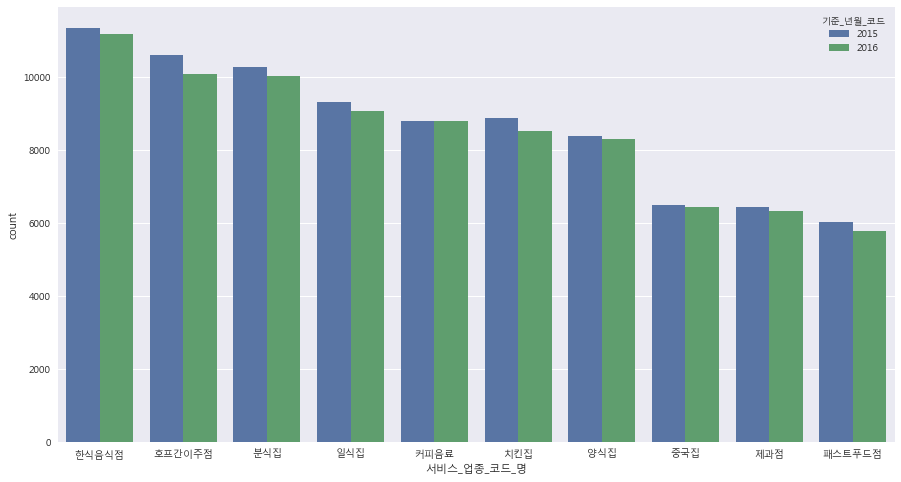

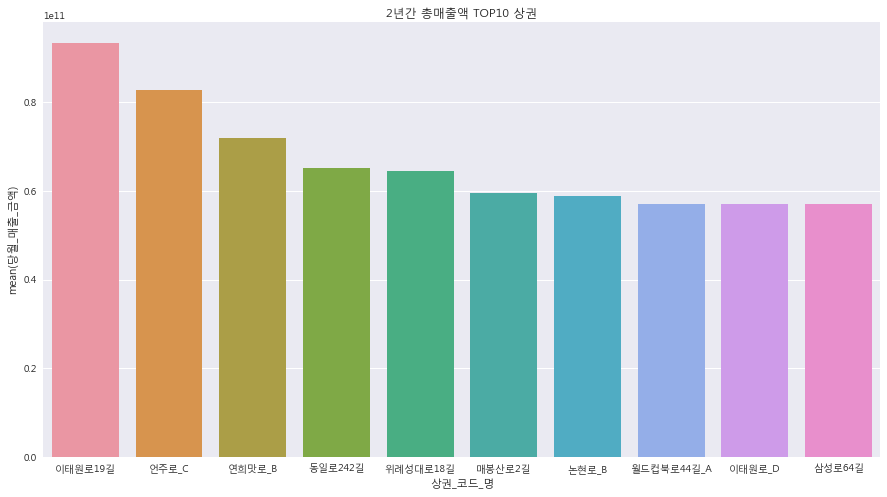

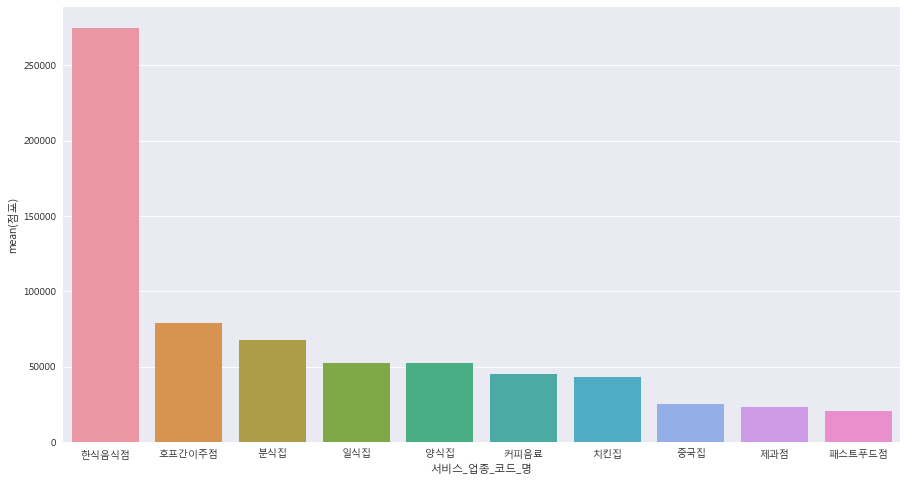

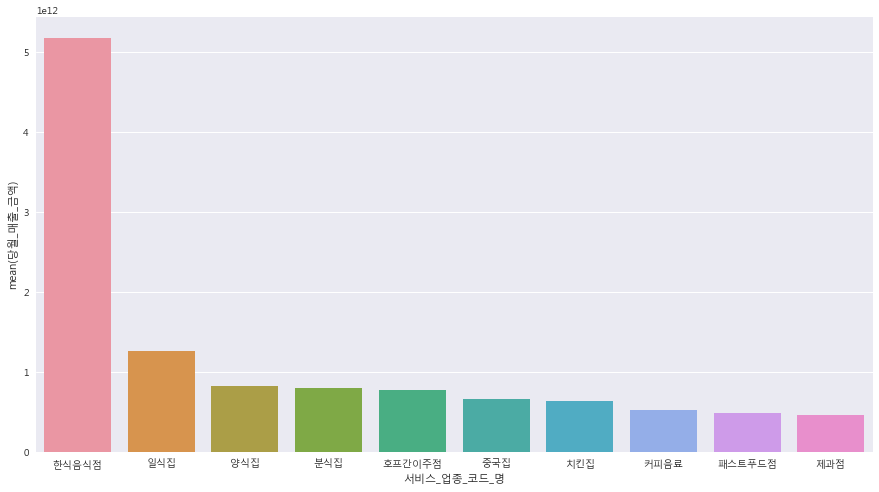

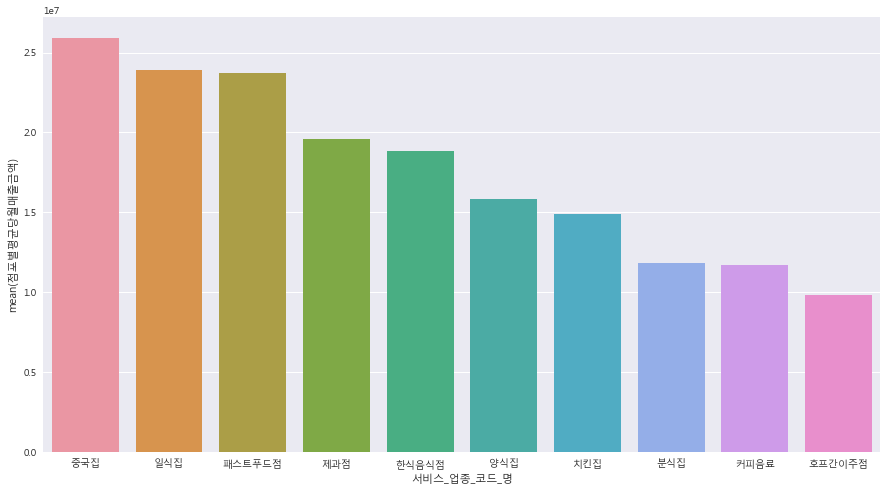

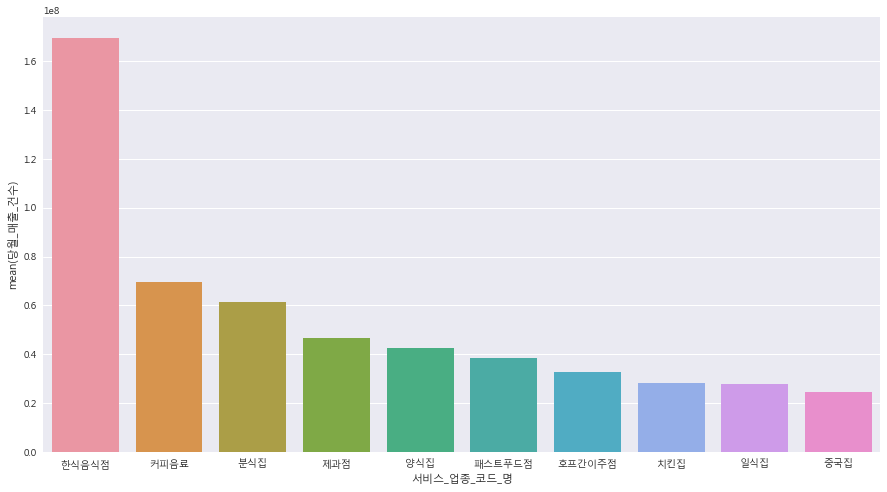

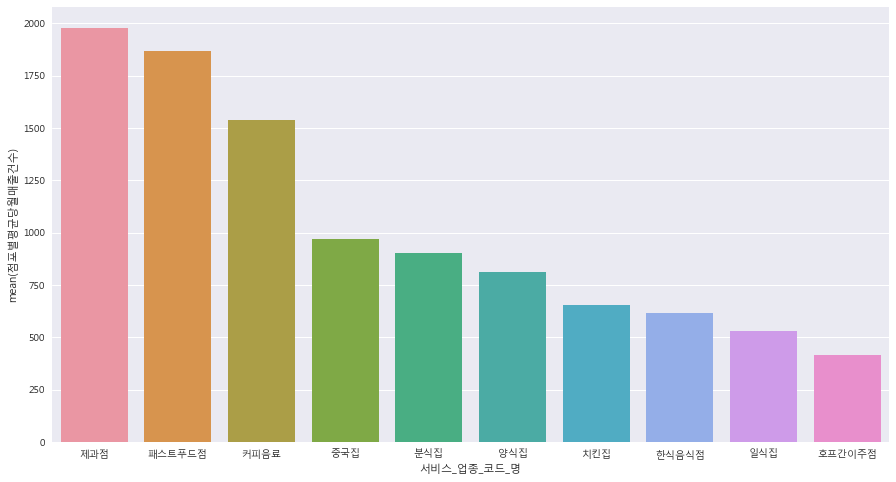

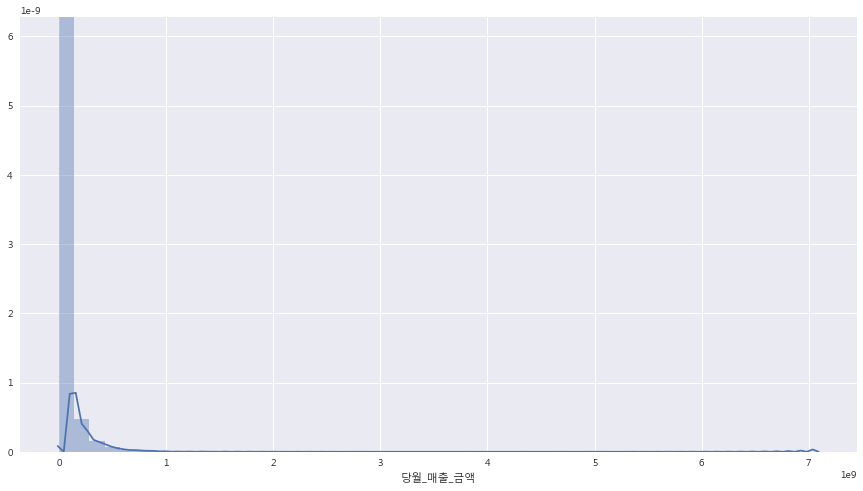

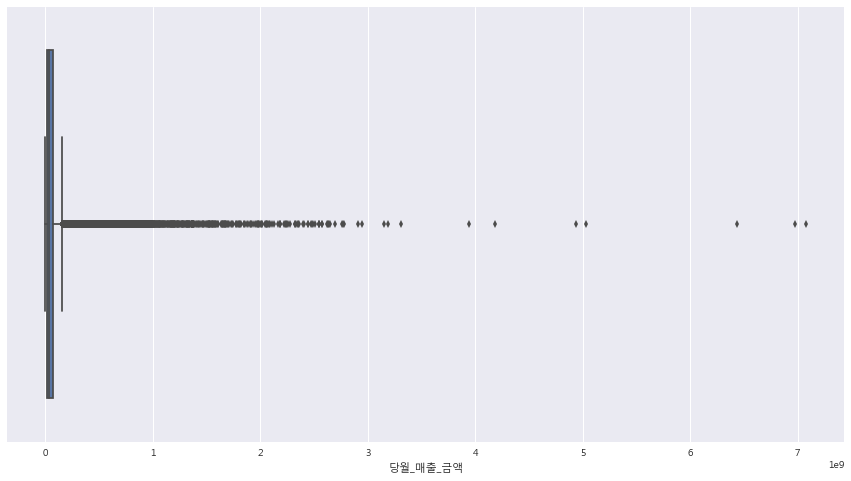

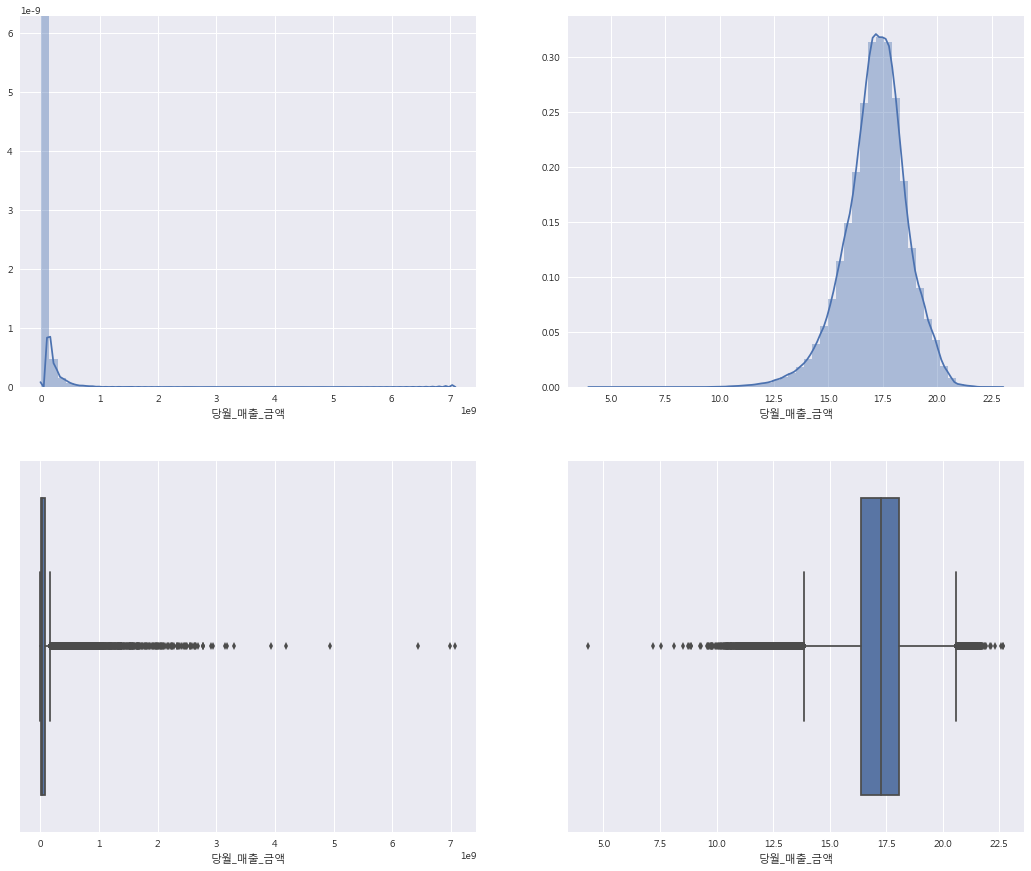

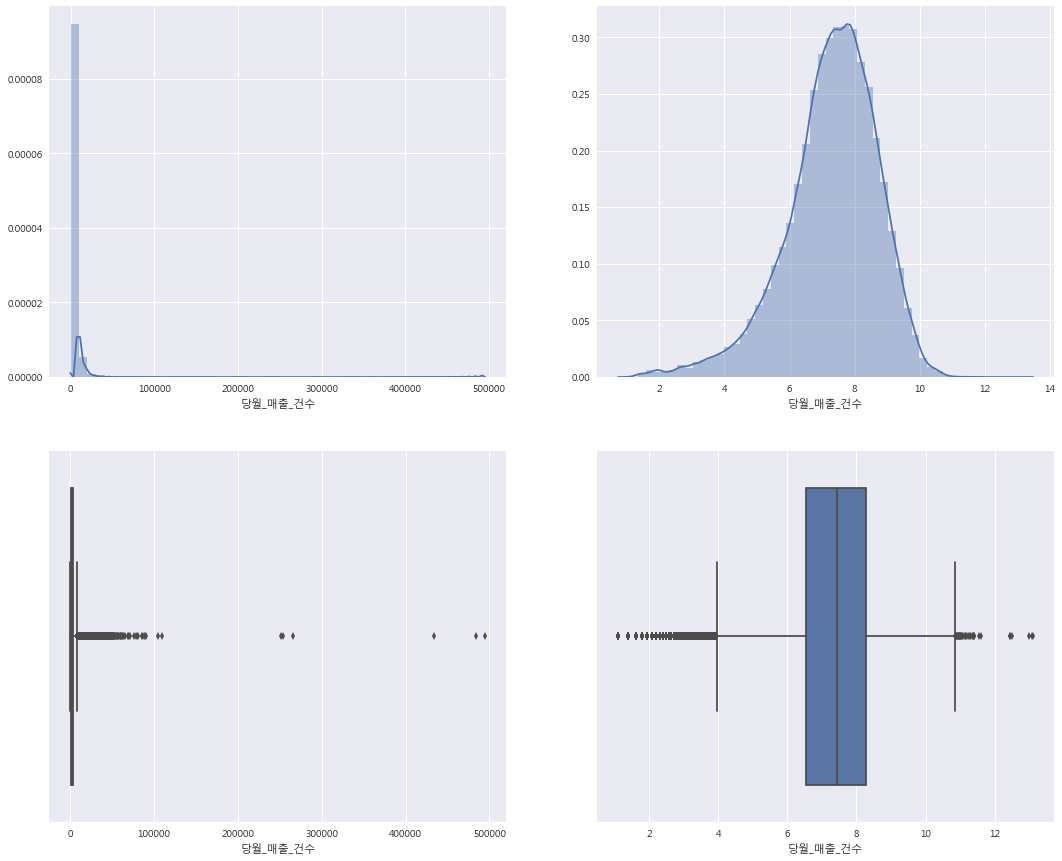

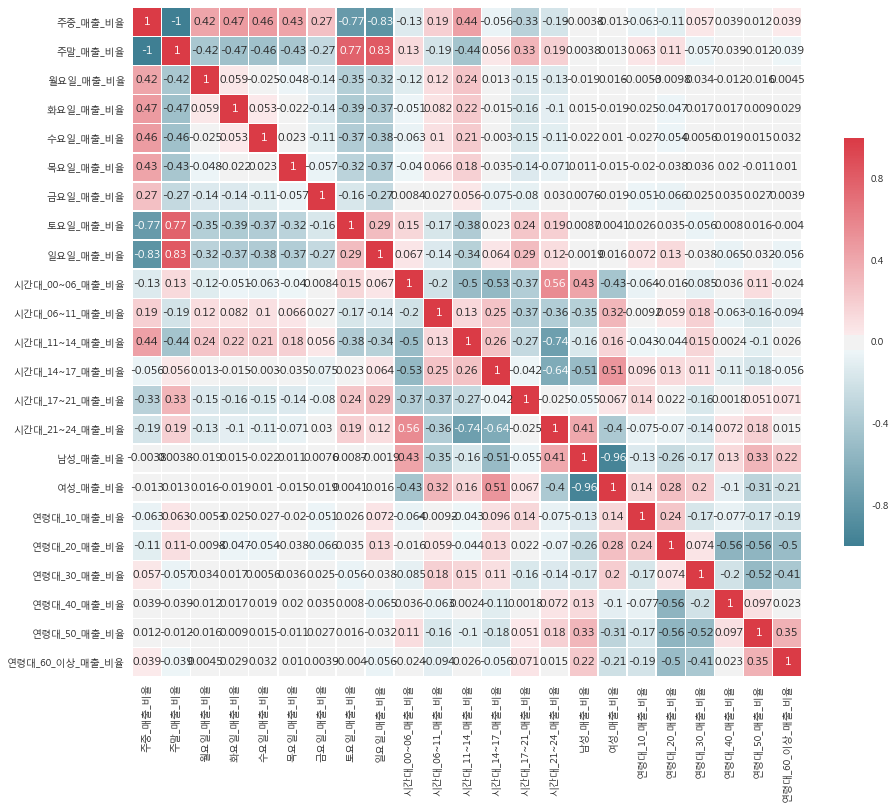

In [32]:
# 변수끼리 서로 상관이 있는지 파악을 위한 heatmap
# 비율컬럼들은 서로 상관성이 많이 떨어짐 지수 사용여부를 검토해봐야할 것
ratio_corr = pd.DataFrame(market[ratio_columns].corr())
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(ratio_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

In [33]:
# # StandardScaler (평균을 0 으로 만들어 줌)
scaler = StandardScaler() 
scaled_ratio = scaler.fit_transform(market[ratio_columns]) 

# 주성분의 개수 선택 방법 : 누적 분산 기준 95%
pca =PCA(n_components=14)
pca.fit(scaled_ratio)

# 누적 고유치 비율
pca_ratio = list(pca.explained_variance_ratio_)
print("1) pca성분 별 비율")
print(pca_ratio)
print("")
print("2) pca성분 별 비율의합 : ",sum(pca_ratio))
print("")
# 가중치 산정
pca_weight = pca_ratio/ sum(pca_ratio)
print("3) 주성분 별 가중치 산정 : ")
print(pca_weight)

ypca = pca.fit_transform(scaled_ratio)

# 새로운 지표 생성
# 주성분 * 가중치
market['ratio_index'] = (ypca * pca_weight).sum(axis=1)

1) pca성분 별 비율
[0.21202799388164204, 0.16666106986420298, 0.092167337465555471, 0.061270463714733124, 0.054193670473629121, 0.050503564303972778, 0.047280599613880876, 0.045492978203141646, 0.042770018453667923, 0.041050693734312194, 0.039560341932773045, 0.030579169596571684, 0.028115520363737621, 0.026242519104716325]

2) pca성분 별 비율의합 :  0.937915940707

3) 주성분 별 가중치 산정 : 
[ 0.2260629   0.17769297  0.09826823  0.06532618  0.05778095  0.05384658
  0.05041027  0.04850432  0.04560112  0.04376799  0.04217898  0.03260332
  0.02997659  0.02797961]


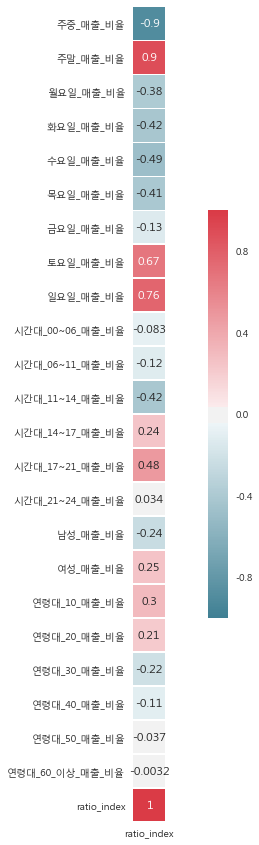

In [34]:
ratio_columns =[
    '주중_매출_비율','주말_매출_비율','월요일_매출_비율','화요일_매출_비율','수요일_매출_비율',
    '목요일_매출_비율','금요일_매출_비율','토요일_매출_비율','일요일_매출_비율','시간대_00~06_매출_비율',
    '시간대_06~11_매출_비율','시간대_11~14_매출_비율','시간대_14~17_매출_비율','시간대_17~21_매출_비율',
    '시간대_21~24_매출_비율','남성_매출_비율','여성_매출_비율','연령대_10_매출_비율','연령대_20_매출_비율',
    '연령대_30_매출_비율','연령대_40_매출_비율','연령대_50_매출_비율','연령대_60_이상_매출_비율','ratio_index'
]
ratio_corr = pd.DataFrame(market[ratio_columns].corr()['ratio_index'])
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(ratio_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

- 매출가격지수 생성

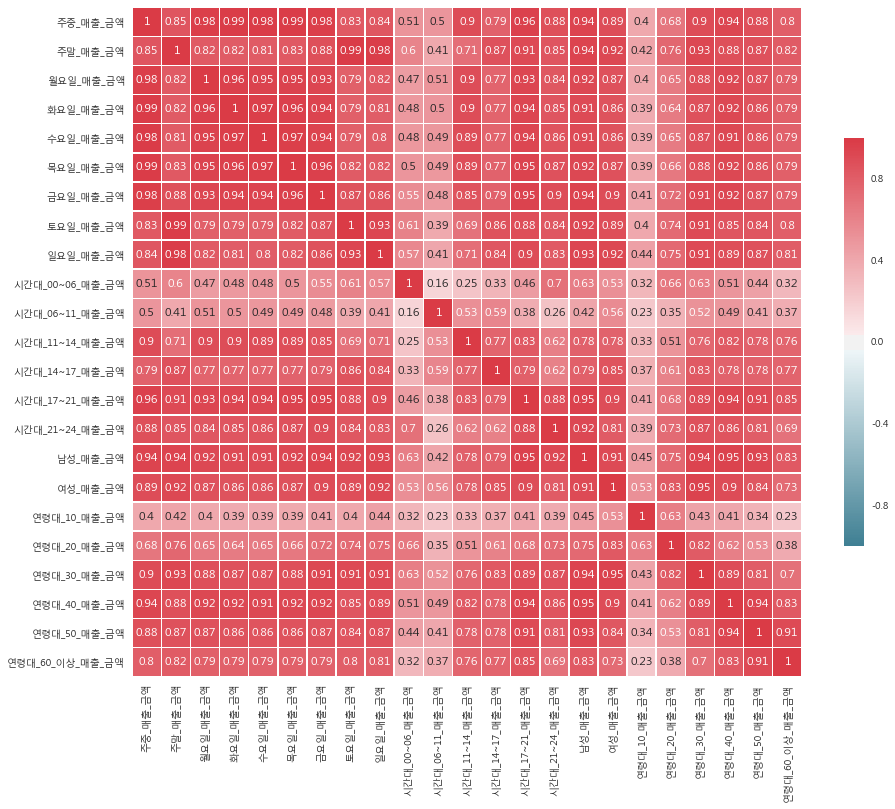

In [35]:
# 가격변수들의 상관관계 확인
price_corr = pd.DataFrame(market[price_columns].corr())
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(price_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

In [36]:
scaler = StandardScaler() 
scaled_price = scaler.fit_transform(market[price_columns]) 

pca2 =PCA(n_components=4)
pca2.fit(scaled_price)

# 누적 고유치 비율
pca2_price = list(pca2.explained_variance_ratio_)
print("1) pca성분 별 비율 : ")
print(pca2_price)
print("")
print("2) pca성분 별 비율의합 : ")
print(sum(pca2_price))
print("")

# 가중치 산정
pca2_weight = pca2_price/ sum(pca2_price)
print("3) 가중치 산정 : ")
print(pca2_weight)

ypca2 = pca2.fit_transform(scaled_price)

market['price_index'] = (ypca2 * pca2_weight).sum(axis=1)

1) pca성분 별 비율 : 
[0.77814343425665, 0.06359213622060364, 0.044716006765910102, 0.032454842089800456]

2) pca성분 별 비율의합 : 
0.918906419333

3) 가중치 산정 : 
[ 0.84681467  0.06920415  0.0486622   0.03531899]


In [37]:
price_columns = ['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', 
                 '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', 
                 '남성_매출_금액', '여성_매출_금액', 
                 '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액','price_index']

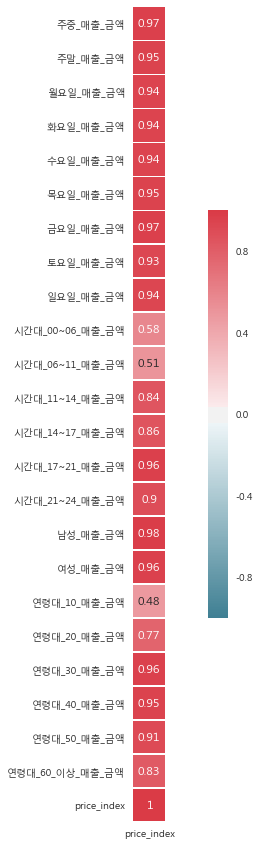

In [38]:
price_corr = pd.DataFrame(market[price_columns].corr()['price_index'])
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(price_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

- 매출건수지수 생성

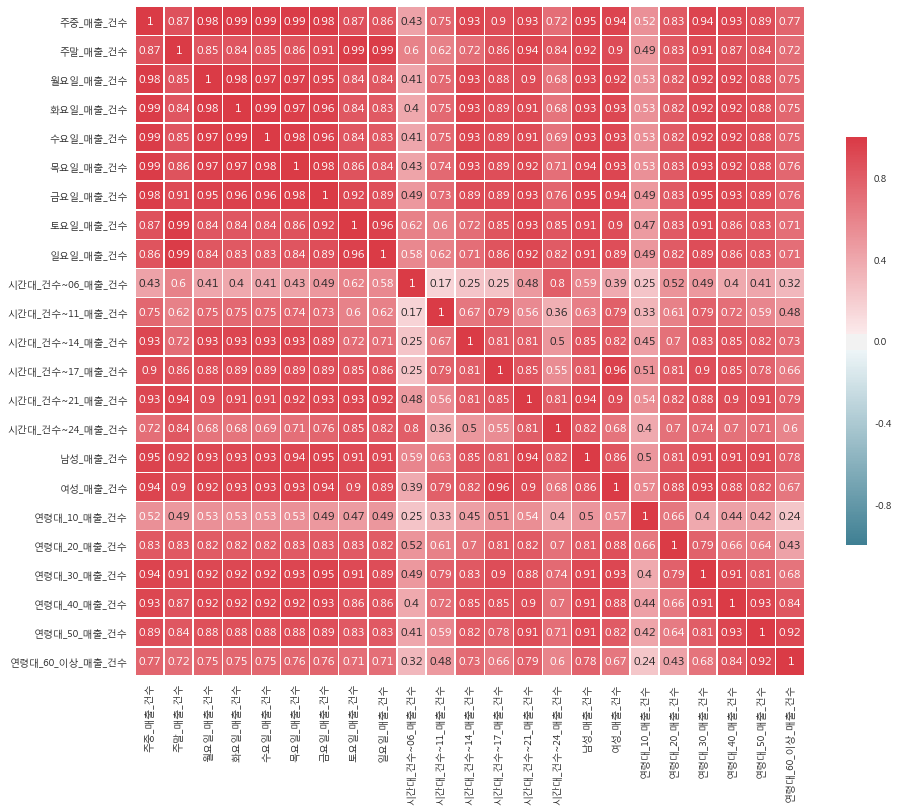

In [39]:
count_corr = pd.DataFrame(market[count_columns].corr())
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(count_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

In [40]:
scaler = StandardScaler() 
scaled_count = scaler.fit_transform(market[count_columns]) 

pca3 =PCA(n_components=4)
pca3.fit(scaled_count)

# 누적 고유치 비율
pca3_count = list(pca3.explained_variance_ratio_)
print("1) pca성분 별 비율")
print(pca3_count)
print("")
print("2) pca성분 별 비율의합")
print(sum(pca3_count))
print("")
# 가중치 산정
pca3_weight = pca3_count/ sum(pca3_count)
print("3) 가중치 산정")
print(pca3_weight)

ypca3 = pca3.fit_transform(scaled_count)

market['count_index'] = (ypca3 * pca3_weight).sum(axis=1)

1) pca성분 별 비율
[0.79878009062138833, 0.066271152985300827, 0.045796384939506385, 0.028908881138484527]

2) pca성분 별 비율의합
0.939756509685

3) 가중치 산정
[ 0.84998623  0.07051949  0.04873218  0.0307621 ]


In [41]:
count_columns = ['주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', 
                 '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', 
                 '남성_매출_건수', '여성_매출_건수', 
                 '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수','count_index']

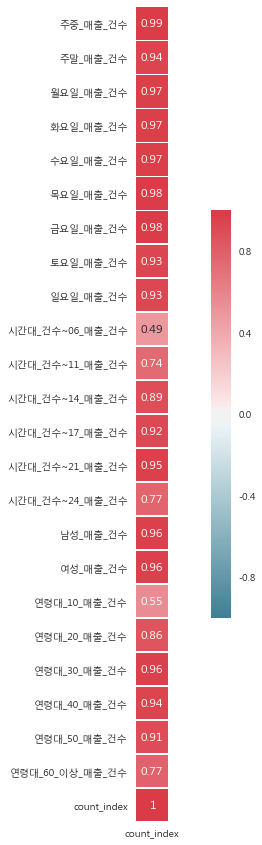

In [42]:
count_corr = pd.DataFrame(market[count_columns].corr()['count_index'])
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(count_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

- 유동인구 PCA

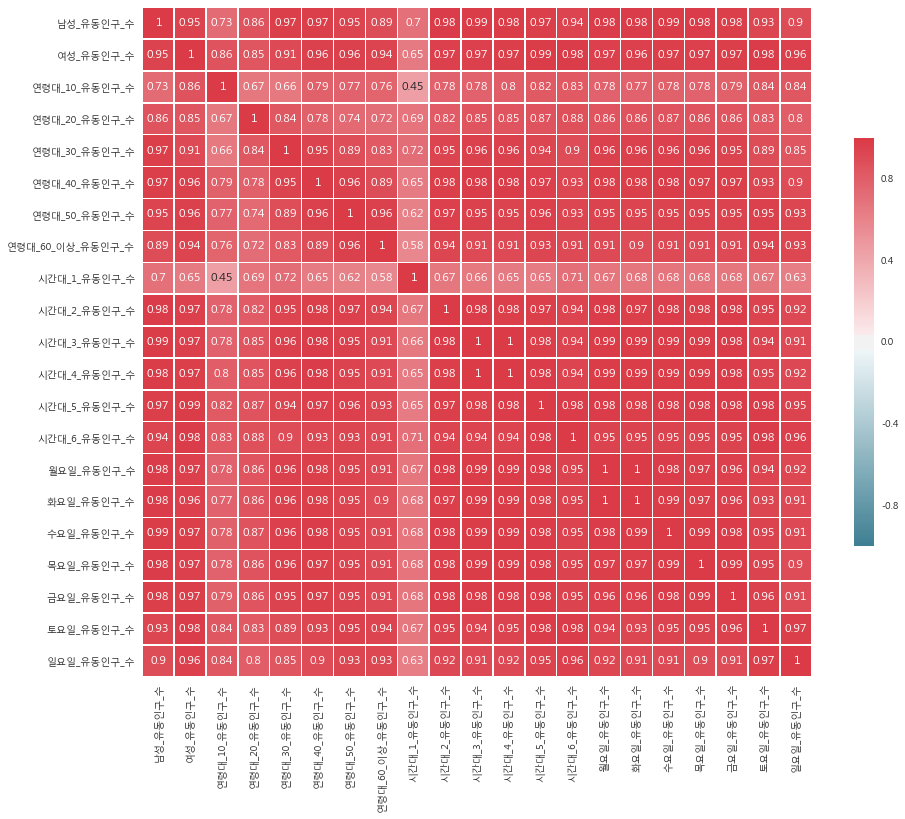

In [43]:
fpop_corr = pd.DataFrame(market[fpop_columns].corr())
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(fpop_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

In [44]:
# StandardScaler (평균을 0 으로 만들어 줌)
scaler = StandardScaler() 
scaled_fpop = scaler.fit_transform(market[fpop_columns]) 

pca4 =PCA(n_components=2)
pca4.fit(scaled_fpop)

# 누적 고유치 비율
pca4_fpop = list(pca4.explained_variance_ratio_)
print("1) pca성분 별 비율")
print(pca4_fpop)
print("")
print("2) pca성분 별 비율의합")
print(sum(pca4_fpop))
print("")
# 가중치 산정
pca4_weight = pca4_fpop/ sum(pca4_fpop)
print("3) 가중치 산출")
print(pca4_weight)

ypca4 = pca4.fit_transform(scaled_fpop)

market['fpop_index'] = (ypca4 * pca4_weight).sum(axis=1)

1) pca성분 별 비율
[0.90936017658889001, 0.032755279911252634]

2) pca성분 별 비율의합
0.9421154565

3) 가중치 산출
[ 0.9652322  0.0347678]


In [45]:
fpop_columns = ['남성_유동인구_수', '여성_유동인구_수',
                '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
                '시간대_1_유동인구_수', '시간대_2_유동인구_수', '시간대_3_유동인구_수', '시간대_4_유동인구_수', '시간대_5_유동인구_수', '시간대_6_유동인구_수', 
                '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수','fpop_index']

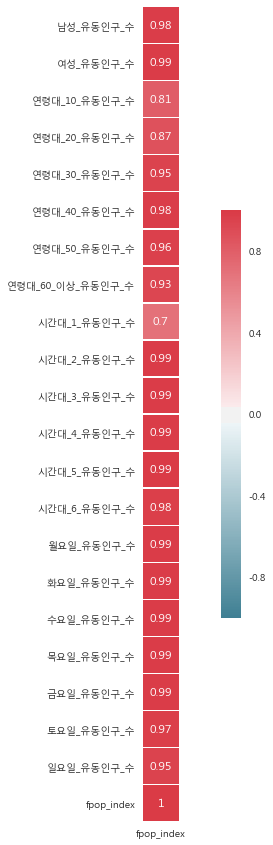

In [46]:
fpop_corr = pd.DataFrame(market[fpop_columns].corr()['fpop_index'])
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(fpop_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

- 직장인구지표 생성

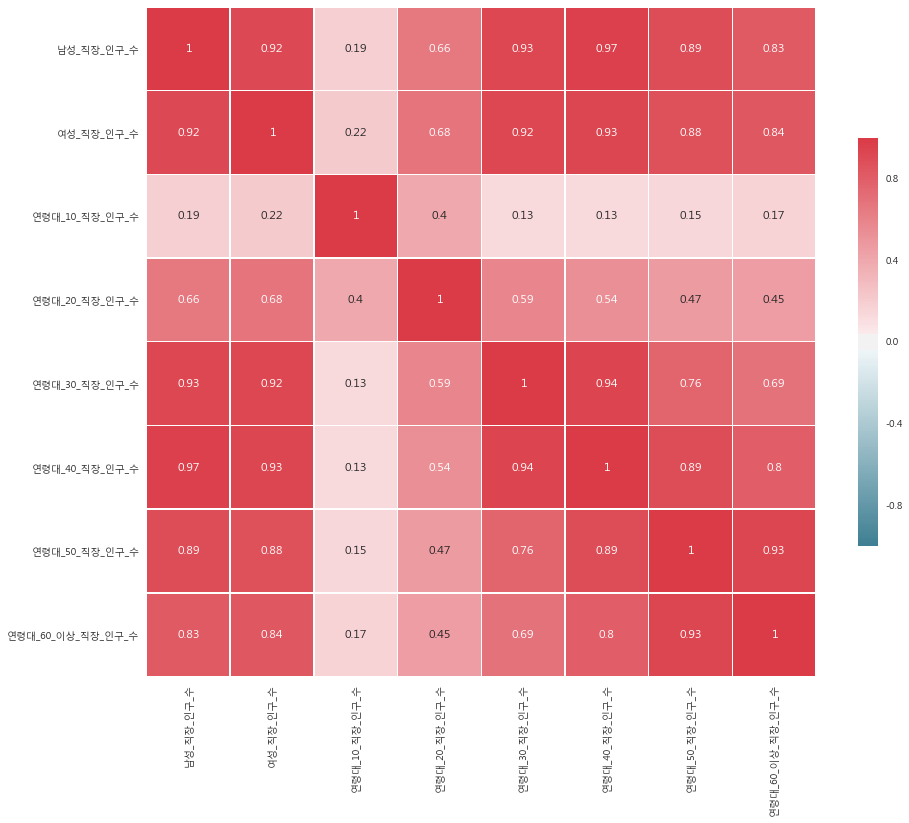

In [47]:
work_pop_corr = pd.DataFrame(market[work_pop_columns].corr())
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(work_pop_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

In [48]:
# StandardScaler (평균을 0 으로 만들어 줌)
scaler = StandardScaler() 
scaled_work_pop = scaler.fit_transform(market[work_pop_columns]) 

pca5 =PCA(n_components=3)
pca5.fit(scaled_work_pop)

# 누적 고유치 비율
pca5_work_pop = list(pca5.explained_variance_ratio_)
print("1) pca성분 별 비율")
print(pca5_work_pop)
print("")
print("2) pca성분 별 비율의합")
print(sum(pca5_work_pop))
print("")
# 가중치 산정
pca5_weight = pca5_work_pop/ sum(pca5_work_pop)
print("3) 가중치 산정")
print(pca5_weight)

1) pca성분 별 비율
[0.72955546325278497, 0.13952016177454479, 0.069518138405511382]

2) pca성분 별 비율의합
0.938593763433

3) 가중치 산정
[ 0.77728565  0.14864808  0.07406627]


In [49]:
ypca5 = pca5.fit_transform(scaled_work_pop)

In [50]:
market['work_pop_index'] = (ypca5*pca5_weight).sum(axis=1)

In [51]:
work_pop_columns = ['남성_직장_인구_수', '여성_직장_인구_수',
                    '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수','work_pop_index']

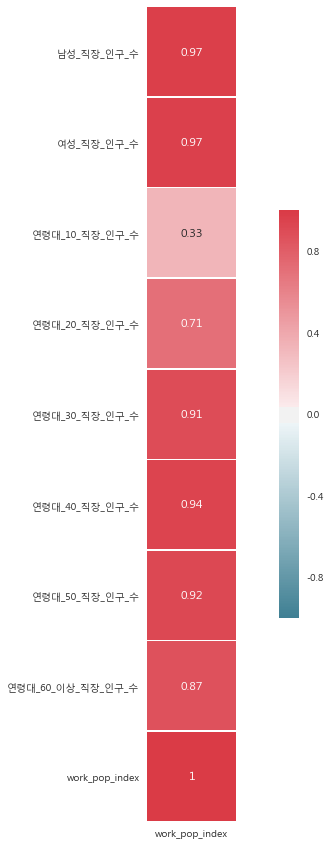

In [52]:
work_pop_corr = pd.DataFrame(market[work_pop_columns].corr()['work_pop_index'])
fig,ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(work_pop_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2g',annot=True)
plt.show()

# 3. 클러스터링

- 클러스터링 목적 : 연속형 숫자값을 갖는 비슷한 특성(컬럼)들을 범주화 시켜주고 하나의 컬럼으로 만들어주기 위함

In [53]:
market_df = market[['기준_년월_코드', '상권_코드',
 '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
 '당월_매출_금액', '당월_매출_건수',
 '점포', '총_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수',
 '월_평균_소득_금액', '집객시설_수',
 '총_유동인구_수','price_index','count_index','fpop_index','work_pop_index']]

In [54]:
market_df.iloc[:,10:20].head()

,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,price_index,count_index,fpop_index,work_pop_index
0,84.0,0.0,460.0,10.0,11239.0,0.995091,1.140490,6.024819,-1.601652
1,84.0,0.0,460.0,10.0,11239.0,-1.534085,-1.690546,6.024819,-1.601652
2,84.0,0.0,460.0,10.0,11239.0,-1.820707,-1.876163,6.024819,-1.601652
3,84.0,0.0,460.0,10.0,11239.0,-1.387322,-0.800621,6.024819,-1.601652
4,84.0,0.0,460.0,10.0,11239.0,1.798019,5.935183,6.024819,-1.601652


In [55]:
scaler = MinMaxScaler()
market_df[['price_index','count_index','fpop_index','work_pop_index']] = scaler.fit_transform(market_df[['price_index','count_index','fpop_index','work_pop_index']])

In [56]:
# 상권 클러스터
# 월별 각 상권 의 매출금액, 매출 건수, 총 점포 수, 생성지표
# 매출금액,매출 건수 ,점포수 , 비율지표, 매출지표, 건수지표는 업종별로 구분되어있었으므로 groupby시 sum 해줌
# 그 외 나머지 변수들은 상권별로 구분되어있던 데이터라 mean해줌
com_df_1 = market_df.groupby(['기준_년월_코드','상권_코드_명'])['당월_매출_금액','당월_매출_건수','점포',
                                                     'price_index','count_index'].sum().reset_index()
com_df_2 = market_df.groupby(['기준_년월_코드','상권_코드_명'])['총_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수',
 '월_평균_소득_금액', '집객시설_수','fpop_index','work_pop_index'].mean().reset_index()

com_df = pd.merge(com_df_1,com_df_2,on=['기준_년월_코드','상권_코드_명'],how='inner')

In [57]:
com_df.head()

,기준_년월_코드,상권_코드_명,당월_매출_금액,당월_매출_건수,점포,price_index,count_index,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,fpop_index,work_pop_index
0,201501,가락로12길,203681715,8202,18,0.034176,0.016247,307.0,139.0,0.0,139.0,493.0,4.0,0.107282,0.025251
1,201501,가락로28길,187839648,14652,13,0.032305,0.029547,891.0,300.0,0.0,300.0,359.0,4.0,0.074638,0.069688
2,201501,가락로_D,147821957,3554,14,0.024268,0.006692,2599.0,1186.0,60.0,1126.0,473.0,1.0,0.035015,0.074234
3,201501,가락로_E,88285393,5418,15,0.020088,0.010772,2170.0,988.0,0.0,988.0,456.0,6.0,0.078021,0.071431
4,201501,가락로_F,1649996095,47155,75,0.211224,0.091677,4703.0,1749.0,60.0,1689.0,377.0,17.0,0.057679,0.311543


In [58]:
com_columns = [i for i in com_df.columns if i not in ['기준_년월_코드','상권_코드_명']]

In [59]:
# scale조정과 normalize 동시에 진행
# 이유 ? 성분별로 분포와 scale을 동일시 하기 위해
# 정규화 방법으로는 sklearn의 normalize사용

scaler = StandardScaler() 
scaled_com = scaler.fit_transform(com_df[com_columns]) 
nor_scale_com = normalize(scaled_com)

In [60]:
pca7 = PCA(n_components = 8)
pca7.fit(nor_scale_com)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
# 지표생성과 마찬가지로 누적비율 95%의 주성분을 구함(8개)
print(sum(pca7.explained_variance_ratio_))
P7 = pca7.transform(nor_scale_com)

0.978359294694


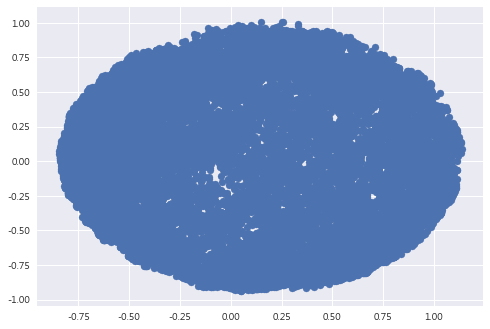

In [62]:
plt.scatter(P7[:, 0], P7[:, 1])
plt.show()

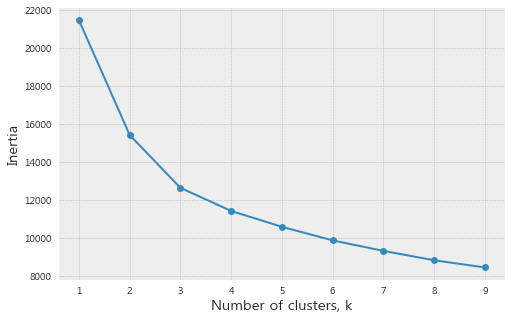

In [63]:
# 최적의 k값 찾기
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(P7)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

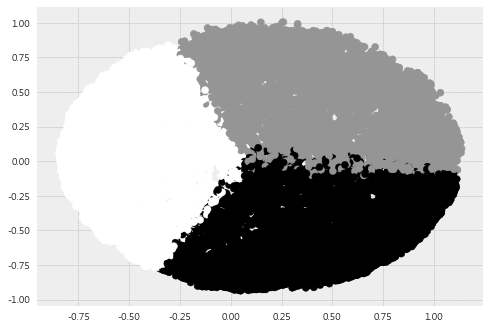

In [64]:
kms = KMeans(n_clusters=3,init='k-means++', random_state=0).fit(P7)
plt.scatter(P7[:, 0], P7[:, 1], c=kms.labels_[:])
plt.show()

In [65]:
y_kmeans_7 = kms.fit_predict(P7)
com_df['com_group'] = y_kmeans_7
com_df['com_group'].value_counts()

0    10368
2     6118
1     6058
Name: com_group, dtype: int64

In [66]:
com_df.iloc[:,:12].head()

,기준_년월_코드,상권_코드_명,당월_매출_금액,당월_매출_건수,점포,price_index,count_index,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액
0,201501,가락로12길,203681715,8202,18,0.034176,0.016247,307.0,139.0,0.0,139.0,493.0
1,201501,가락로28길,187839648,14652,13,0.032305,0.029547,891.0,300.0,0.0,300.0,359.0
2,201501,가락로_D,147821957,3554,14,0.024268,0.006692,2599.0,1186.0,60.0,1126.0,473.0
3,201501,가락로_E,88285393,5418,15,0.020088,0.010772,2170.0,988.0,0.0,988.0,456.0
4,201501,가락로_F,1649996095,47155,75,0.211224,0.091677,4703.0,1749.0,60.0,1689.0,377.0


In [67]:
com_df = com_df[['기준_년월_코드','상권_코드_명','com_group']]
market_df = pd.merge(market_df,com_df,on=['기준_년월_코드','상권_코드_명'],how='left')

In [68]:
market_df.head()

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,price_index,count_index,fpop_index,work_pop_index,com_group
0,201501,11947,당산로44길,CS100001,한식음식점,96722641,4527,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.014826,0.009273,0.191638,0.026806,0
1,201501,11947,당산로44길,CS100004,양식집,14242932,910,1,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.002944,0.001778,0.191638,0.026806,0
2,201501,11947,당산로44길,CS100005,분식집,5084735,653,1,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.001597,0.001287,0.191638,0.026806,0
3,201501,11947,당산로44길,CS100006,패스트푸드점,18820989,2098,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.003633,0.004134,0.191638,0.026806,0
4,201501,11947,당산로44길,CS100008,제과점,124446237,11102,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.018599,0.021967,0.191638,0.026806,0


# 4. 파생변수 생성

In [69]:
# 아파트, 비아파트 비율변수
market_df['아파트_가구_비율'] = market_df['아파트_가구_수'] / market_df['총_가구_수']
market_df['비_아파트_가구_비율'] = market_df['비_아파트_가구_수'] / market_df['총_가구_수']
# 금액,건수 비율변수
market_df['점포별평균당월매출금액'] = market_df['당월_매출_금액']/market_df['점포']
market_df['점포별평균당월매출건수'] = market_df['당월_매출_건수']/market_df['점포']
# 년도, 월 분리
market_df['년도'] = market_df['기준_년월_코드'].apply(lambda x:str(x)[:4]).astype(int)
market_df['월'] = market_df['기준_년월_코드'].apply(lambda x:str(x)[4:]).astype(int)

# 당월 매출 금액 변화량 
data = sales.pivot_table("당월_매출_금액","기준_년월_코드","상권_코드_명")
data = data.diff()
data = pd.DataFrame(data.unstack()).pivot_table(0,index=['기준_년월_코드','상권_코드_명'])
data = data.reset_index()
market_df = pd.merge(market_df,data,on=['기준_년월_코드','상권_코드_명'],how='left')
market_df.rename(columns={0:"전월_대비_매출_금액_변화량"},inplace=True)

# 당월 매출 건수 변화량 
data1 = sales.pivot_table("당월_매출_건수","기준_년월_코드","상권_코드_명")
data1 = data1.diff()
data1 = pd.DataFrame(data1.unstack()).pivot_table(0,index=['기준_년월_코드','상권_코드_명'])
data1 = data1.reset_index()
market_df = pd.merge(market_df,data1,on=['기준_년월_코드','상권_코드_명'],how='left')
market_df.rename(columns={0:"전월_대비_매출_건수_변화량"},inplace=True)

# 유동인구수 변화량
data2 = com_fpop.pivot_table("총_유동인구_수","기준_년월_코드","상권_코드_명")
data2 = data2.diff()
data2 = pd.DataFrame(data2.unstack()).pivot_table(0,index=['기준_년월_코드','상권_코드_명'])
data2 = data2.reset_index()
market_df = pd.merge(market_df,data2,on=['기준_년월_코드','상권_코드_명'],how='left')
market_df.rename(columns={0:"전월_대비_유동인구수_변화량"},inplace=True)

In [70]:
# 시각화에 쓰일 최종 market_df 파일
market_df.to_csv('market_df_final.csv',index=False)